# **Machine Learning - CE717**
## HW2 Practical  Solutions - Regression & Generalization (30 points)
*Dr. Soleymani, Fall 2020*

*Note: The codes are just a sample solution. Your implementation and results doesn't have to be exactly like this. It should only have the desired functionality.*

### Instructions:

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`.<br/>
We highly recommend you to read each line of code carefully and try to 
understand what it exactly does.<br/>
Just alter the parts that is between green comments and specified for you. <br/>
Please do not change other parts.

# Linear Regression

In this assignment, you will implement multivariate linear regression. The exercises are designed to walk you through implementing regression algorithm from scratch in python. We have provided the skeleton of all the functions and classes that you need to implement. You should use the instructions in each section and complete the codes when needed.    

### Datasets
You are going to use two datasets in your implementations. These datasets are located in the `data` directory.
- `weights.txt`: 
This dataset records the average weight of the brain and body for a number of mammal species. The goal is to make a good prediction of the body weight based on the brain weight. We use this dataset for the univariate linear regression problem.

 **Columns**

     - brain: the brain weight;
     - body:  the body weight.
     
     
- `insurance.csv`: 
This dataset contains the medical insurance costs of a group of individuals and some data about their health and life situation. The goal is to predict the charges based on these features. We use this dataset for the multivariate linear regression problem.

  **Columns**

     - age: age of primary beneficiary
     - sex: insurance contractor gender, female, male
     - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
     - children: Number of children covered by health insurance / Number of dependents
     - smoker: Smoking
     - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
     - charges: Individual medical costs billed by health insurance

## 1. Setup

### 1.1 Importing Libraries

In [1]:
### You can not use any other library in your implementation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Modules needed for 3d surface plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### 1.2 Visualizing the Data

Visualization of data often provides valuable insight into the problem, but is frequently overlooked as part
of the machine learning process. We will start by visualizing the univariate data set using a 2D scatter
plot of the output vs the input. However, in this course we will typically be dealing with multi-dimensional
datasets. Once we go beyond two dimensions, visualization becomes much more difficult. In such cases, we
must either visualize each dimension separately, or use dimensionality reduction techniques (such as PCA)
to reduce the number of features.

In [2]:
univariate_path = "data/weights.txt"
multivariate_path = "data/insurance.csv"

Complete the function below and load the datasets.

In [3]:
# loading the data

def load_data_uni(file_path):
    X, y = None, None
    ########################################################################
    data = pd.read_csv(file_path, header = None)[1:][0]
    data = data.str.split().reset_index(drop=True)
    data = pd.DataFrame.from_records([x[1:] for x in data])
    y = data[1].to_frame().to_numpy().astype(np.float)
    X = data[0].to_frame().to_numpy().astype(np.float)
    ########################################################################
    return X, y

def load_data_mult(file_path):
    X, y = None, None
    ########################################################################
    data = pd.read_csv(file_path, header = None)[1:]
    data[4] = data[4].replace(to_replace=['no', 'yes'], value=[0, 1])
    data[1] = data[1].replace(to_replace=['female', 'male'], value=[0, 1])
    data = pd.concat([data, pd.get_dummies(data[5], prefix='dir')], axis=1).drop(5, axis=1)
    X = data.drop(6, axis=1).to_numpy().astype(np.float)
    y = data[6].to_frame().to_numpy().astype(np.float)
    #######################################################################
    return X, y

#  TODO: load the datasets using the function above (1pts)
X_uni, y_uni = load_data_uni(univariate_path)
X_mult, y_mult = load_data_mult(multivariate_path)

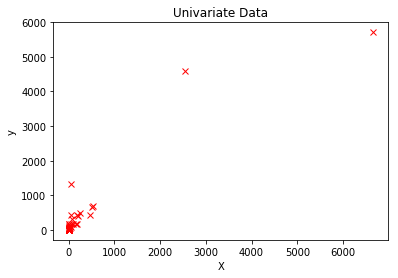

In [4]:
########################################################################
from plot_functions import plotData1D
plotData1D(X_uni, y_uni)
########################################################################

## 2. Implementing Regression

Implement multivariate linear regression via gradient descent by completing the LinearRegression class
skeleton according to the instructions. Be certain not to change the class API. The only places you need to change in the code are marked
with “TODO” comments.

### 2.1 Implementation 
Implement the `LinearRegression` class using the API below.

In [5]:
class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=1):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None

    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        for i in range(self.n_iter):
            self.JHist.append((self.computeCost(X, y, theta), theta))
            print("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta: ", theta)
            ########################################################################
            hypothesis = np.dot(X, theta)
            loss = hypothesis-y
            gradient = np.dot(X.T, loss)/n
            theta = theta - self.alpha*gradient
            ########################################################################
        return theta

    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost  
        '''
        ########################################################################
        n = len(y) 
        J = np.sum((np.dot(X, theta)-y.reshape((-1,)))**2)/(2*n)
        return J
        ########################################################################

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        ########################################################################
        n = len(y)
        n,d = X.shape
        if self.theta is None:
            self.theta = np.matrix(np.zeros((d, 1)))
        self.theta = self.gradientDescent(X, y, self.theta)
        ########################################################################

    def predict(self, X):
        '''
        Use the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        ########################################################################
        return np.dot(X, self.theta)
        ########################################################################

### 2.2 Test 
The functions below are going to test and visualize your implementations. Refer to the instructions in the code and fill between the comments.

In [6]:
def linreg_test_univariate(file_path, alpha=0.1):
    # load the data
    X, y = load_data_uni(file_path)
    n, d = X.shape
    
    ########################################################################
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    X = np.c_[np.ones((n,1)), X]
    ########################################################################
    
    # initialize the model
    init_theta = np.matrix(np.ones((d+1,1)))  # note that we really should be initializing this to be near zero, but starting it near [10,10] works better to visualize gradient descent for this particular problem
    n_iter = 1500

    # Instantiate objects
    lr_model = LinearRegression(init_theta=init_theta, alpha=alpha, n_iter=n_iter)
    plotData1D(X[:,1],y)
    lr_model.fit(X,y)
    plotRegLine1D(lr_model, X, y)

    # Visualize the objective function convex shape
    theta1_vals = np.linspace(-20, 20, 400)
    theta2_vals = np.linspace(-20, 20, 400)
    visualizeObjective(lr_model,theta1_vals, theta2_vals, X, y.reshape((-1,)))
    

    # Compute the closed form solution in one line of code
    theta_closed_form = 0  
    ########################################################################
    theta_closed_form = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    ########################################################################
    print("Theta Closed Form: ", theta_closed_form)

In [7]:
def linreg_test_multivariate(file_path, alpha=0.1):
    # load the data
    X, y = load_data_mult(file_path)
    n, d = X.shape
    
    ########################################################################
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    X = np.c_[np.ones((n,1)), X]
    ########################################################################
    
    # initialize the model
    init_theta = np.matrix(np.random.randn((d+1))).T
    n_iter = 1000

    # Instantiate objects
    lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
    lr_model.fit(X, y)

    # Compute the closed form solution in one line of code
    theta_closed_form = 0  
    ########################################################################
    theta_closed_form = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    ########################################################################
    print("Theta Closed Form: ", theta_closed_form)

## 3. Understanding Gradient Descent 

To better understand our implementation, we will visualize the objective function and the path chosen by gradient descent.
For the univariate data set, we can plot the variation of the objective function over the space of $θ0$ and $θ1$ as a surface plot and a contour plot to show the convex shape and the descent. Once you have the plot, move it around to clearly observe the path taken by gradient descent. Explore these results by changing the starting point for gradient descent (i.e., the initial value of $θ$). You can refer to the `visualizeObjective` function in `plot_functions.py` for more details.

## 4. Accelerating Our Implementation

Although it won’t make much difference with the small data sets we’re using in this problem, we can often
make machine learning implementations much faster and more concise by vectorizing our code. Modify your
previous implementation to compute the cost function and gradient updates using only matrix operations
. Make sure you are not using any loops within your equations.

## 5. Closed-Form Solution

In this section, you will implement the closed-form solution for linear regression. Recall that the closed-form
solution is given by
$$θ = (X^TX)^{-1}X^Ty$$

Update the code in the `linreg_test_DATA` functions to print out the solution obtained using the closed form formula. For full credit, your computation should only require one line of code. Confirm that your implementation yields nearly the same result as the closed form solution in both the univariate and multivariate cases.

On first glance, using the closed form solution seems a lot easier than going through the trouble of using
gradient descent. However, there are important cases where using gradient descent to solve linear
regression is essential. Can you explain two such senarios?

### Question:
Explain two senarios when using gradient descent to solve linear regression is *essential*. 

**Senario 1: (2.5pts)** *When the size of X becomes large (either in terms of the number of instances or the number of features), the matrix inversion required to obtain the closed form solution becomes extremely computationally
expensive. Gradient descent is much faster in this case.*



**Senario 2: (2.5pts)** *In the online learning paradigm, training instances arrive in a stream, one after the other. Consequently, we don’t have all of the data available (as required for the closed form solution), and so much use
alternative techniques, such as stochastic gradient descent, which we will discuss later in the semester.
(As a quick primer, stochastic gradient descent uses only one data instance to update the model
parameters and is used as a fast approximation for batch gradient descent.)* 


## 6. Final Tests

Now you can test your linear regression model for univariate & multivariate data and see the results.

In [8]:
from plot_functions import plotRegLine1D, visualizeObjective

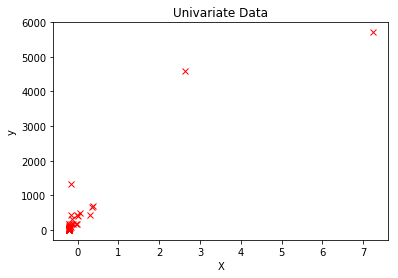

Iteration:  1  Cost:  151333872.926919  Theta:  [[1.]
 [1.]]
Iteration:  2  Cost:  -20380445.904895473  Theta:  [[29.21341935]
 [87.09961313]]
Iteration:  3  Cost:  -172307193.08922893  Theta:  [[ 54.60549677]
 [164.58926494]]
Iteration:  4  Cost:  -306922192.3460463  Theta:  [[ 77.45836645]
 [234.32995157]]
Iteration:  5  Cost:  -426359242.3778252  Theta:  [[ 98.02594916]
 [297.09656954]]
Iteration:  6  Cost:  -532462263.4739472  Theta:  [[116.5367736 ]
 [353.58652571]]
Iteration:  7  Cost:  -626828820.0751488  Theta:  [[133.19651559]
 [404.42748627]]
Iteration:  8  Cost:  -710846529.4841307  Theta:  [[148.19028339]
 [450.18435077]]
Iteration:  9  Cost:  -785723592.8112139  Theta:  [[161.68467441]
 [491.36552882]]
Iteration:  10  Cost:  -852514460.9413782  Theta:  [[173.82962632]
 [528.42858906]]
Iteration:  11  Cost:  -912141466.2785155  Theta:  [[184.76008304]
 [561.78534328]]
Iteration:  12  Cost:  -965413102.5381305  Theta:  [[194.59749409]
 [591.80642208]]
Iteration:  13  Cost:  

Iteration:  104  Cost:  -1428090127.857011  Theta:  [[283.12873051]
 [861.97945957]]
Iteration:  105  Cost:  -1428092889.9613872  Theta:  [[283.12927681]
 [861.98112674]]
Iteration:  106  Cost:  -1428095375.8543446  Theta:  [[283.12976849]
 [861.98262719]]
Iteration:  107  Cost:  -1428097613.1572118  Theta:  [[283.13021099]
 [861.9839776 ]]
Iteration:  108  Cost:  -1428099626.7291486  Theta:  [[283.13060925]
 [861.98519296]]
Iteration:  109  Cost:  -1428101438.9433706  Theta:  [[283.13096768]
 [861.98628679]]
Iteration:  110  Cost:  -1428103069.9357483  Theta:  [[283.13129027]
 [861.98727124]]
Iteration:  111  Cost:  -1428104537.8285463  Theta:  [[283.13158059]
 [861.98815724]]
Iteration:  112  Cost:  -1428105858.931787  Theta:  [[283.13184189]
 [861.98895464]]
Iteration:  113  Cost:  -1428107047.9244797  Theta:  [[283.13207706]
 [861.9896723 ]]
Iteration:  114  Cost:  -1428108118.017721  Theta:  [[283.1322887]
 [861.9903182]]
Iteration:  115  Cost:  -1428109081.1014915  Theta:  [[283.

Iteration:  205  Cost:  -1428117748.1888602  Theta:  [[283.13419342]
 [861.99613086]]
Iteration:  206  Cost:  -1428117748.2548885  Theta:  [[283.13419343]
 [861.9961309 ]]
Iteration:  207  Cost:  -1428117748.3143141  Theta:  [[283.13419344]
 [861.99613094]]
Iteration:  208  Cost:  -1428117748.3677974  Theta:  [[283.13419345]
 [861.99613097]]
Iteration:  209  Cost:  -1428117748.4159322  Theta:  [[283.13419346]
 [861.996131  ]]
Iteration:  210  Cost:  -1428117748.4592535  Theta:  [[283.13419347]
 [861.99613102]]
Iteration:  211  Cost:  -1428117748.4982429  Theta:  [[283.13419348]
 [861.99613105]]
Iteration:  212  Cost:  -1428117748.533333  Theta:  [[283.13419349]
 [861.99613107]]
Iteration:  213  Cost:  -1428117748.5649142  Theta:  [[283.13419349]
 [861.99613109]]
Iteration:  214  Cost:  -1428117748.5933375  Theta:  [[283.1341935 ]
 [861.99613111]]
Iteration:  215  Cost:  -1428117748.6189182  Theta:  [[283.1341935 ]
 [861.99613112]]
Iteration:  216  Cost:  -1428117748.6419408  Theta:  [[

Iteration:  346  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  347  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  348  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  349  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  350  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  351  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  352  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  353  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  354  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  355  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  356  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  357  Cost:  -1428117748.8491447  Theta:  [

Iteration:  453  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  454  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  455  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  456  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  457  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  458  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  459  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  460  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  461  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  462  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  463  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  464  Cost:  -1428117748.8491447  Theta:  [

 [861.99613126]]
Iteration:  601  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  602  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  603  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  604  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  605  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  606  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  607  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  608  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  609  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  610  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  611  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  612  Cost:  -1428117748.8

 [861.99613126]]
Iteration:  722  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  723  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  724  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  725  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  726  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  727  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  728  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  729  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  730  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  731  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  732  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  733  Cost:  -1428117748.8

 [861.99613126]]
Iteration:  860  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  861  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  862  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  863  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  864  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  865  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  866  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  867  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  868  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  869  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  870  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  871  Cost:  -1428117748.8

 [861.99613126]]
Iteration:  995  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  996  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  997  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  998  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  999  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1000  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1001  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1002  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1003  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1004  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1005  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1006  Cost:  -14281

 [861.99613126]]
Iteration:  1123  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1124  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1125  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1126  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1127  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1128  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1129  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1130  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1131  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1132  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1133  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1134  Cost:  -

Iteration:  1228  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1229  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1230  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1231  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1232  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1233  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1234  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1235  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1236  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1237  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1238  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1239  Cost:  -1428117748.849144

Iteration:  1333  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1334  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1335  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1336  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1337  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1338  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1339  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1340  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1341  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1342  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1343  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1344  Cost:  -1428117748.849144

Iteration:  1440  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1441  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1442  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1443  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1444  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1445  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1446  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1447  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1448  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1449  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1450  Cost:  -1428117748.8491447  Theta:  [[283.13419355]
 [861.99613126]]
Iteration:  1451  Cost:  -1428117748.849144

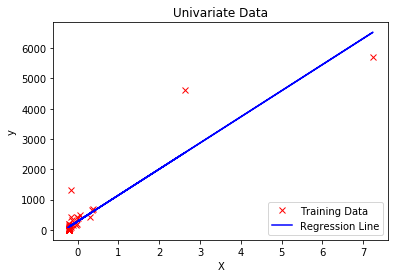

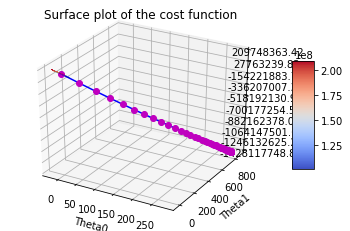

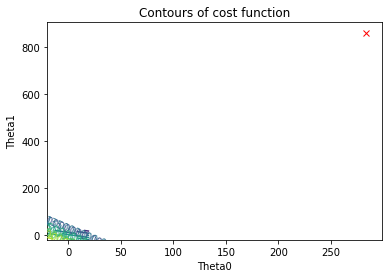

Theta Closed Form:  [[283.13419355]
 [861.99613126]]


In [9]:
linreg_test_univariate(univariate_path)

In [10]:
linreg_test_multivariate(multivariate_path)

Iteration:  1  Cost:  157669039059872.97  Theta:  [[-1.5140852 ]
 [ 0.71889182]
 [ 0.28543378]
 [ 1.64549435]
 [-0.81394871]
 [-0.41332637]
 [ 0.46084344]
 [-0.73417765]
 [-0.68848041]
 [ 0.25716136]]
Iteration:  2  Cost:  117671941079258.98  Theta:  [[1325.67954984]
 [ 362.5947561 ]
 [  69.61070389]
 [ 241.58945381]
 [  81.57799296]
 [ 952.63649815]
 [   8.08207506]
 [ -48.94514935]
 [  88.89490103]
 [ -52.10835248]]
Iteration:  3  Cost:  84419742009800.3  Theta:  [[2520.15382137]
 [ 687.99309892]
 [ 124.01613806]
 [ 449.79888361]
 [ 153.49583568]
 [1809.61798668]
 [  17.97883353]
 [ -83.99717542]
 [ 153.78605168]
 [ -94.28212349]]
Iteration:  4  Cost:  56716478527437.37  Theta:  [[3595.18066574]
 [ 980.64247457]
 [ 165.87643236]
 [ 630.84788085]
 [ 216.17497622]
 [2580.43508421]
 [  29.38802912]
 [-108.4399696 ]
 [ 198.81525502]
 [-127.9646702 ]]
Iteration:  5  Cost:  33584671124233.297  Theta:  [[4562.70482568]
 [1243.88049598]
 [ 197.22579661]
 [ 788.61938559]
 [ 270.71337801]
 [32

Iteration:  38  Cost:  -96266613338270.38  Theta:  [[ 1.30013263e+04]
 [ 3.53842518e+03]
 [-5.81214143e-01]
 [ 2.00225730e+03]
 [ 5.85431306e+02]
 [ 9.39891209e+03]
 [ 2.41542291e+02]
 [ 7.23809385e+01]
 [-1.38213349e+02]
 [-1.70973520e+02]]
Iteration:  39  Cost:  -96485673792478.9  Theta:  [[ 1.30282359e+04]
 [ 3.54564848e+03]
 [-5.37911766e+00]
 [ 2.00714607e+03]
 [ 5.84837643e+02]
 [ 9.42019849e+03]
 [ 2.42620346e+02]
 [ 7.49443526e+01]
 [-1.42877098e+02]
 [-1.69774155e+02]]
Iteration:  40  Cost:  -96682502581934.56  Theta:  [[ 1.30524546e+04]
 [ 3.55213500e+03]
 [-9.85438105e+00]
 [ 2.01165848e+03]
 [ 5.84241049e+02]
 [ 9.43945504e+03]
 [ 2.43607162e+02]
 [ 7.73044752e+01]
 [-1.47169491e+02]
 [-1.68665722e+02]]
Iteration:  41  Cost:  -96859478321625.89  Theta:  [[13074.25132754]
 [ 3557.95868667]
 [  -14.02451295]
 [ 2015.82538755]
 [  583.64778096]
 [ 9456.87695732]
 [  244.51089999]
 [   79.47637532]
 [ -151.11835515]
 [ -167.64256472]]
Iteration:  42  Cost:  -97018704732416.64  

Iteration:  74  Cost:  -98437740758705.83  Theta:  [[13264.35996437]
 [ 3606.66159428]
 [  -62.30134806]
 [ 2063.51255852]
 [  573.91384916]
 [ 9617.3004879 ]
 [  254.21737065]
 [  102.46560478]
 [ -192.92761107]
 [ -156.94144401]]
Iteration:  75  Cost:  -98443507356392.48  Theta:  [[13264.96619445]
 [ 3606.77880775]
 [  -62.57683279]
 [ 2063.81953845]
 [  573.83967121]
 [ 9617.90905408]
 [  254.27648455]
 [  102.5843954 ]
 [ -193.14577366]
 [ -156.89289308]]
Iteration:  76  Cost:  -98448735540712.75  Theta:  [[13265.51180152]
 [ 3606.88189607]
 [  -62.82991654]
 [ 2064.10403668]
 [  573.77125799]
 [ 9618.46119347]
 [  254.33131114]
 [  102.69350773]
 [ -193.3463037 ]
 [ -156.84867885]]
Iteration:  77  Cost:  -98453476007634.47  Theta:  [[13266.00284788]
 [ 3606.97242404]
 [  -63.06238844]
 [ 2064.367696  ]
 [  573.70819095]
 [ 9618.9621754 ]
 [  254.38216707]
 [  102.79373965]
 [ -193.53064578]
 [ -156.80841642]]
Iteration:  78  Cost:  -98457774634359.02  Theta:  [[13266.44478961]
 [ 

Iteration:  110  Cost:  -98498022345076.17  Theta:  [[13270.28569121]
 [ 3607.51732868]
 [  -65.50456117]
 [ 2067.42703672]
 [  573.0363183 ]
 [ 9623.69779539]
 [  254.9821502 ]
 [  103.8655309 ]
 [ -195.51769283]
 [ -156.41754719]]
Iteration:  111  Cost:  -98498200650502.52  Theta:  [[13270.2993486 ]
 [ 3607.51557359]
 [  -65.51692361]
 [ 2067.44666005]
 [  573.03300304]
 [ 9623.71701493]
 [  254.98617189]
 [  103.87144674]
 [ -195.52887031]
 [ -156.41588132]]
Iteration:  112  Cost:  -98498362788408.27  Theta:  [[13270.31164025]
 [ 3607.51380053]
 [  -65.52825779]
 [ 2067.46483344]
 [  573.02997327]
 [ 9623.73450095]
 [  254.98990349]
 [  103.87689841]
 [ -195.53917859]
 [ -156.41436347]]
Iteration:  113  Cost:  -98498510237173.17  Theta:  [[13270.32270274]
 [ 3607.51202494]
 [  -65.53864927]
 [ 2067.48166372]
 [  573.02720473]
 [ 9623.75041109]
 [  254.9933658 ]
 [  103.88192269]
 [ -195.54868593]
 [ -156.41298042]]
Iteration:  114  Cost:  -98498644338924.19  Theta:  [[13270.33265898

Iteration:  146  Cost:  -98499935776334.84  Theta:  [[13270.41918835]
 [ 3607.47808974]
 [  -65.64683484]
 [ 2067.67551239]
 [  572.99959173]
 [ 9623.90497994]
 [  255.03397838]
 [  103.93732667]
 [ -195.6542856 ]
 [ -156.39937067]]
Iteration:  147  Cost:  -98499941932185.08  Theta:  [[13270.41949603]
 [ 3607.47773387]
 [  -65.64738529]
 [ 2067.67673787]
 [  572.99946917]
 [ 9623.90565524]
 [  255.03424389]
 [  103.93765118]
 [ -195.6549129 ]
 [ -156.39930944]]
Iteration:  148  Cost:  -98499947548192.44  Theta:  [[13270.41977294]
 [ 3607.47740042]
 [  -65.64789052]
 [ 2067.6778722 ]
 [  572.99935747]
 [ 9623.90627159]
 [  255.03448994]
 [  103.93795082]
 [ -195.65549241]
 [ -156.3992535 ]]
Iteration:  149  Cost:  -98499952672198.66  Theta:  [[13270.42002216]
 [ 3607.4770881 ]
 [  -65.64835428]
 [ 2067.67892216]
 [  572.99925566]
 [ 9623.9068342 ]
 [  255.03471794]
 [  103.93822751]
 [ -195.65602778]
 [ -156.39920238]]
Iteration:  150  Cost:  -98499957347764.11  Theta:  [[13270.42024646

Iteration:  183  Cost:  -98500004109260.33  Theta:  [[13270.42220276]
 [ 3607.47310786]
 [  -65.65328349]
 [ 2067.69103201]
 [  572.99825436]
 [ 9623.9125058 ]
 [  255.0373759 ]
 [  103.94135033]
 [ -195.66209778]
 [ -156.39868136]]
Iteration:  184  Cost:  -98500004329760.66  Theta:  [[13270.422209  ]
 [ 3607.47308119]
 [  -65.65330749]
 [ 2067.69110178]
 [  572.99825043]
 [ 9623.91253036]
 [  255.03739151]
 [  103.94136765]
 [ -195.66213173]
 [ -156.39867905]]
Iteration:  185  Cost:  -98500004531675.73  Theta:  [[13270.42221461]
 [ 3607.47305641]
 [  -65.65332957]
 [ 2067.69116635]
 [  572.99824685]
 [ 9623.91255285]
 [  255.03740596]
 [  103.94138366]
 [ -195.66216311]
 [ -156.39867692]]
Iteration:  186  Cost:  -98500004716590.75  Theta:  [[13270.42221966]
 [ 3607.47303339]
 [  -65.65334988]
 [ 2067.6912261 ]
 [  572.99824358]
 [ 9623.91257345]
 [  255.03741935]
 [  103.94139845]
 [ -195.66219213]
 [ -156.39867498]]
Iteration:  187  Cost:  -98500004885954.19  Theta:  [[13270.42222421

Iteration:  219  Cost:  -98500006633954.34  Theta:  [[13270.42226374]
 [ 3607.4727607 ]
 [  -65.6535696 ]
 [ 2067.69190897]
 [  572.99821157]
 [ 9623.91278779]
 [  255.03757316]
 [  103.94156584]
 [ -195.6625212 ]
 [ -156.39865453]]
Iteration:  220  Cost:  -98500006643807.0  Theta:  [[13270.42226388]
 [ 3607.4727589 ]
 [  -65.65357083]
 [ 2067.69191322]
 [  572.99821143]
 [ 9623.9127889 ]
 [  255.03757413]
 [  103.94156686]
 [ -195.66252323]
 [ -156.39865442]]
Iteration:  221  Cost:  -98500006652860.33  Theta:  [[13270.422264  ]
 [ 3607.47275723]
 [  -65.65357197]
 [ 2067.69191716]
 [  572.9982113 ]
 [ 9623.91278992]
 [  255.03757503]
 [  103.94156781]
 [ -195.6625251 ]
 [ -156.39865432]]
Iteration:  222  Cost:  -98500006661179.72  Theta:  [[13270.42226412]
 [ 3607.47275568]
 [  -65.65357302]
 [ 2067.69192081]
 [  572.99821118]
 [ 9623.91279086]
 [  255.03757586]
 [  103.94156869]
 [ -195.66252683]
 [ -156.39865423]]
Iteration:  223  Cost:  -98500006668825.55  Theta:  [[13270.42226422]

Iteration:  256  Cost:  -98500006750842.42  Theta:  [[13270.42226511]
 [ 3607.47273762]
 [  -65.65358464]
 [ 2067.69196265]
 [  572.99821001]
 [ 9623.91280098]
 [  255.03758541]
 [  103.9415787 ]
 [ -195.66254663]
 [ -156.39865323]]
Iteration:  257  Cost:  -98500006751296.02  Theta:  [[13270.42226512]
 [ 3607.47273751]
 [  -65.6535847 ]
 [ 2067.69196289]
 [  572.99821   ]
 [ 9623.91280103]
 [  255.03758546]
 [  103.94157876]
 [ -195.66254675]
 [ -156.39865323]]
Iteration:  258  Cost:  -98500006751713.88  Theta:  [[13270.42226512]
 [ 3607.47273742]
 [  -65.65358476]
 [ 2067.69196311]
 [  572.99821   ]
 [ 9623.91280107]
 [  255.03758551]
 [  103.94157881]
 [ -195.66254685]
 [ -156.39865322]]
Iteration:  259  Cost:  -98500006752098.88  Theta:  [[13270.42226512]
 [ 3607.47273733]
 [  -65.65358481]
 [ 2067.69196332]
 [  572.99820999]
 [ 9623.91280112]
 [  255.03758556]
 [  103.94157886]
 [ -195.66254695]
 [ -156.39865322]]
Iteration:  260  Cost:  -98500006752453.67  Theta:  [[13270.42226512

 [ -156.39865317]]
Iteration:  293  Cost:  -98500006756357.61  Theta:  [[13270.42226514]
 [ 3607.47273628]
 [  -65.65358541]
 [ 2067.69196566]
 [  572.99820995]
 [ 9623.9128016 ]
 [  255.0375861 ]
 [  103.94157941]
 [ -195.66254805]
 [ -156.39865317]]
Iteration:  294  Cost:  -98500006756380.33  Theta:  [[13270.42226514]
 [ 3607.47273627]
 [  -65.65358541]
 [ 2067.69196568]
 [  572.99820995]
 [ 9623.9128016 ]
 [  255.0375861 ]
 [  103.94157942]
 [ -195.66254805]
 [ -156.39865317]]
Iteration:  295  Cost:  -98500006756401.33  Theta:  [[13270.42226514]
 [ 3607.47273626]
 [  -65.65358541]
 [ 2067.69196569]
 [  572.99820995]
 [ 9623.91280161]
 [  255.03758611]
 [  103.94157942]
 [ -195.66254806]
 [ -156.39865317]]
Iteration:  296  Cost:  -98500006756420.64  Theta:  [[13270.42226514]
 [ 3607.47273626]
 [  -65.65358542]
 [ 2067.6919657 ]
 [  572.99820995]
 [ 9623.91280161]
 [  255.03758611]
 [  103.94157942]
 [ -195.66254807]
 [ -156.39865317]]
Iteration:  297  Cost:  -98500006756438.5  Theta:

Iteration:  329  Cost:  -98500006756636.77  Theta:  [[13270.42226514]
 [ 3607.4727362 ]
 [  -65.65358545]
 [ 2067.69196583]
 [  572.99820995]
 [ 9623.91280163]
 [  255.03758614]
 [  103.94157945]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  330  Cost:  -98500006756638.1  Theta:  [[13270.42226514]
 [ 3607.4727362 ]
 [  -65.65358545]
 [ 2067.69196583]
 [  572.99820995]
 [ 9623.91280163]
 [  255.03758614]
 [  103.94157945]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  331  Cost:  -98500006756639.28  Theta:  [[13270.42226514]
 [ 3607.4727362 ]
 [  -65.65358545]
 [ 2067.69196583]
 [  572.99820995]
 [ 9623.91280163]
 [  255.03758614]
 [  103.94157945]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  332  Cost:  -98500006756640.42  Theta:  [[13270.42226514]
 [ 3607.4727362 ]
 [  -65.65358545]
 [ 2067.69196583]
 [  572.99820995]
 [ 9623.91280163]
 [  255.03758614]
 [  103.94157945]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  333  Cost:  -98500006756641.33  Theta:  [[13270.42226514]

Iteration:  366  Cost:  -98500006756652.98  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  367  Cost:  -98500006756653.05  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  368  Cost:  -98500006756653.1  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  369  Cost:  -98500006756653.14  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  370  Cost:  -98500006756653.17  Theta:  [[13270.42226514]

Iteration:  403  Cost:  -98500006756653.8  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  404  Cost:  -98500006756653.8  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  405  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  406  Cost:  -98500006756653.8  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  407  Cost:  -98500006756653.8  Theta:  [[13270.42226514]
 [

Iteration:  439  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  440  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  441  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  442  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  443  Cost:  -98500006756653.83  Theta:  [[13270.42226514

Iteration:  475  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  476  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  477  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  478  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  479  Cost:  -98500006756653.83  Theta:  [[13270.42226514

Iteration:  512  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  513  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  514  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  515  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  516  Cost:  -98500006756653.83  Theta:  [[13270.42226514

Iteration:  549  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  550  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  551  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  552  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  553  Cost:  -98500006756653.83  Theta:  [[13270.42226514

Iteration:  586  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  587  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  588  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  589  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  590  Cost:  -98500006756653.81  Theta:  [[13270.42226514

Iteration:  622  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  623  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  624  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  625  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  626  Cost:  -98500006756653.81  Theta:  [[13270.42226514

Iteration:  658  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  659  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  660  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  661  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  662  Cost:  -98500006756653.81  Theta:  [[13270.42226514

Iteration:  694  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  695  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  696  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  697  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  698  Cost:  -98500006756653.81  Theta:  [[13270.42226514

Iteration:  730  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  731  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  732  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  733  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  734  Cost:  -98500006756653.81  Theta:  [[13270.42226514

Iteration:  767  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  768  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  769  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  770  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  771  Cost:  -98500006756653.83  Theta:  [[13270.42226514

 [ -156.39865317]]
Iteration:  803  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  804  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  805  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  806  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  807  Cost:  -98500006756653.83  Theta

Iteration:  839  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  840  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  841  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  842  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  843  Cost:  -98500006756653.83  Theta:  [[13270.42226514

Iteration:  876  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  877  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  878  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  879  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  880  Cost:  -98500006756653.83  Theta:  [[13270.42226514

Iteration:  913  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  914  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  915  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  916  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  917  Cost:  -98500006756653.83  Theta:  [[13270.42226514

Iteration:  950  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  951  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  952  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  953  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  954  Cost:  -98500006756653.81  Theta:  [[13270.42226514

Iteration:  987  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  988  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  989  Cost:  -98500006756653.83  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  990  Cost:  -98500006756653.81  Theta:  [[13270.42226514]
 [ 3607.47273619]
 [  -65.65358545]
 [ 2067.69196584]
 [  572.99820995]
 [ 9623.91280164]
 [  255.03758614]
 [  103.94157946]
 [ -195.66254813]
 [ -156.39865317]]
Iteration:  991  Cost:  -98500006756653.83  Theta:  [[13270.42226514

## 7. Effect of Learning Rate

In this section, we want to observe the effect of learning rate on cost functions at each iteration. Modify the learning rate (`alpha`) in the input of the `linreg_test_DATA` functions. Test a few values between 0.0001 and 1 and state how the cost function in each iteration and the final result will change.

### Question:
State the effect of learning rate on the results at each iteration and explain why this happens. Show your observations by testing different learning rate values for both univariate & multivariate datasets.

*Your results must show that very low learning rate will make the learning process quite slow (the cost function would be partially constant at each step) and very high learning rate will result in divergence of the gradient. This section is graded according to the explanations of the results you get from your code. * (3pts)

In [11]:
# TODO: Your code goes here.